# Stock Prediction using Scikit-learn

In this project the aim is to model stock price for prediction of price based on past data. To do this I use 3 different types of regression models to see which one provides more accuracy:

- Least-squares linear regression. This simple approach to linear regression uses the **sum of least squares** approach to analyse the data to determine the output variable, which is stock price in this case.


- Ridge regression. This type of linear regression is optimal to analyse data that suffers from multicollinearity (i.e. variables are not independent but highly related instead). In order to do so it **adds a degree of bias** to the regression estimates, which reduces the standard error that least squares has for these cases.


- Lasso regression: this type of regression uses **shrinkage**, where data values are made smaller towards a centrail point (e.g. the mean). This is ideal for models with fewer parameters (sparse).

In order to do this we are going to use the **Scikit-learn** library together with **Pandas** for data-structure representation and **Matplotlib** to plot the resulting data.

In [0]:
#@title ##Input stock to analyse { run: "auto" }
stock = 'AAPL' #@param {type:"string"}

## STEP 1. Installing Yfinance and importing libraries
</br>
The yfinance library will allow us to download the stock data from yahoo-finance.

In [0]:
!pip install yfinance

In [0]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## STEP 2. Retrieving stock data and formatting

In [0]:
stock_data = yf.download(stock, '2008-01-01', '2019-01-01')
stock_data = stock_data.reset_index()

# Make a copy for plotting purposes later.
stock_data_copy = stock_data

# Encode Date into Year and Month variables. Month will be done through the
# use of dummy variables thanks to OneHotEncoding.
stock_data['Year'] = [i.year for i in stock_data['Date']]
stock_data['Month'] = [i.month for i in stock_data['Date']]
stock_data = pd.concat([stock_data,pd.get_dummies(stock_data['Month'], prefix='month', drop_first=True)],axis=1)
stock_data.drop(['Date', 'Month', 'Adj Close'], axis=1, inplace=True)

[*********************100%***********************]  1 of 1 downloaded


## STEP 3. Preprocessing the data and identifying independent variables/labels

In [0]:
# Remove missing values by replacing with mean.
stock_data.fillna(stock_data.mean(), inplace=True)

# Separate labels and independent variables.
labels = stock_data['Close']
independent = stock_data.drop(['Close'], axis=1)

# Normalise independent variables' data.
scaler = preprocessing.StandardScaler()
independent = scaler.fit_transform(independent)

# Separate training and testing datasets on a 80%/20% basis.
cut_index = int(stock_data.shape[0] * 0.8)
x_train = independent[:cut_index]
y_train = labels[:cut_index]
x_test = independent[cut_index:]
y_test = labels[cut_index:]

## STEP 4. Creating regression models and checking performance.

In [0]:
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'

# Regular linear regression.
regression = linear_model.LinearRegression()
regression.fit(x_train, y_train)
regression_pred = regression.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, regression_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, regression_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, regression_pred)))
print()

# Ridge regression with arbitrary alpha.
ridge = linear_model.Ridge(alpha=0.5)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ridge_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print()

# Lasso regression with arbitrary alpha.
lasso = linear_model.Lasso(alpha=0.5)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lasso_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print()

Mean Absolute Error: 0.6233219262571725
Mean Squared Error: 0.8034054482946538
Root Mean Squared Error: 0.8963288728444787

Mean Absolute Error: 0.8056071096854399
Mean Squared Error: 1.339743454847571
Root Mean Squared Error: 1.157472874346337

Mean Absolute Error: 2.7348503815058907
Mean Squared Error: 10.121950239753632
Root Mean Squared Error: 3.1815012556580315



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 608.1322323516351, tolerance: 266.6842448942032
  positive)


## STEP 5. Visualise predictions in graphs using matplotlib

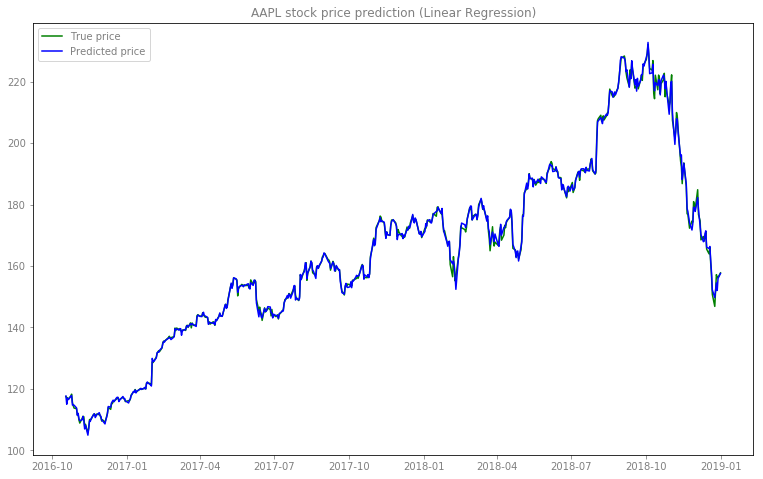

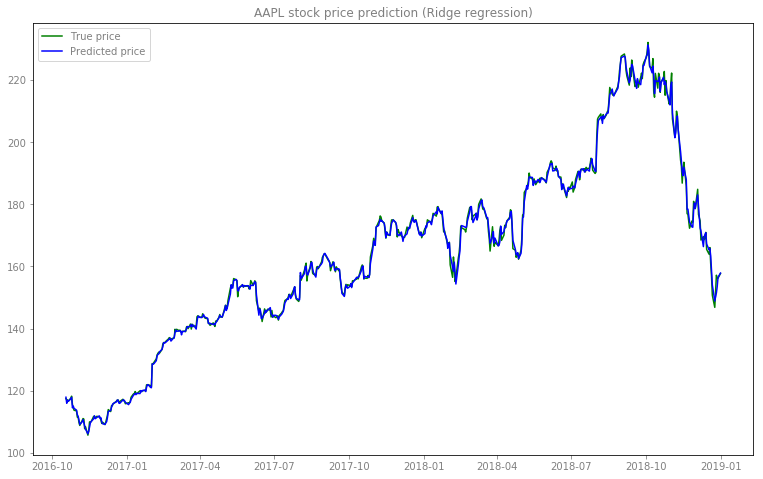

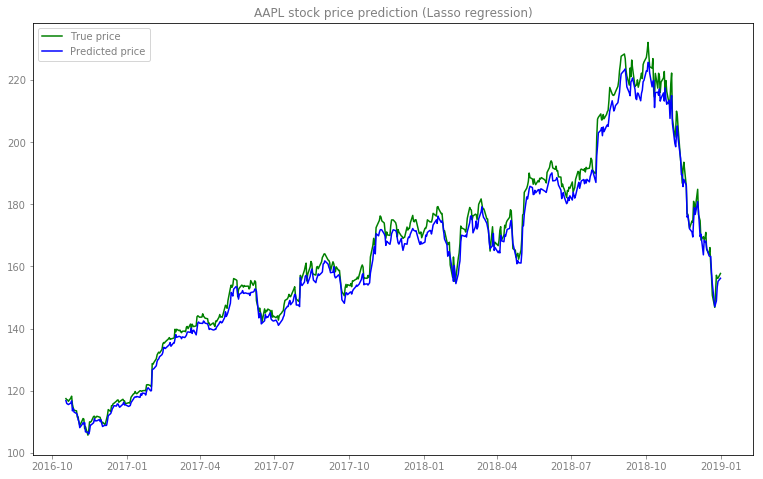

In [0]:
reg_figure = plt.figure(figsize=(10, 6))
reg_ax = reg_figure.add_axes([0, 0, 1, 1])
reg_ax.set_title(stock + ' stock price prediction (Linear Regression)')
reg_ax.plot(stock_data_copy['Date'][cut_index:],
            labels[cut_index:],
            color='green',
            label='True price')
reg_ax.plot(stock_data_copy['Date'][cut_index:],
            regression_pred,
            color='blue',
            label='Predicted price')
reg_legend = reg_ax.legend()

ridge_figure = plt.figure(figsize=(10, 6))
ridge_ax = ridge_figure.add_axes([0, 0, 1, 1])
ridge_ax.set_title(stock + ' stock price prediction (Ridge regression)')
ridge_ax.plot(stock_data_copy['Date'][cut_index:],
              labels[cut_index:],
              color='green',
              label='True price')
ridge_ax.plot(stock_data_copy['Date'][cut_index:],
              ridge_pred,
              color='blue',
              label='Predicted price')
ridge_legend = ridge_ax.legend()

lasso_figure = plt.figure(figsize=(10, 6))
lasso_ax = lasso_figure.add_axes([0, 0, 1, 1])
lasso_ax.set_title(stock + ' stock price prediction (Lasso regression)')
lasso_ax.plot(stock_data_copy['Date'][cut_index:],
              labels[cut_index:],
              color='green',
              label='True price')
lasso_ax.plot(stock_data_copy['Date'][cut_index:],
              lasso_pred,
              color='blue',
              label='Predicted price')
lasso_legend = lasso_ax.legend()